# 크로울링 robots.txt 해석

In [ ]:
from urllib import robotparser

In [3]:
robot = robotparser.RobotFileParser()
robot.set_url("https://www.google.com/robots.txt")
robot.read()

In [8]:
# 가져올 수 있나 없나 물어보는 메서드

robot.can_fetch("Agent", "/")

False

In [12]:
# 조금 부정확할 때가 있다.
# google에서 /search/about은 bot을 허용하고 있는데...

robot.can_fetch("Agent", "/search/about")

False

In [13]:
# 네이버 뉴스에서 해보자.

robot = robotparser.RobotFileParser()
robot.set_url("https://news.naver.com/robots.txt")
robot.read()

In [14]:
# 네이버에서는 정상적으로 동작한다.
# user-agent: Yeti만 네이버에서는 허용하고 있다.

robot.can_fetch("Yeti", "/main/imagemontage")

True

In [15]:
# 다른 agent에 대해서 사이트 전체는 불허용하고 있다.

robot.can_fetch("Agent", "/")

False

In [21]:
# 특정 id에 대한 봇 접근은 불허용한다. 

robot.can_fetch("Agent", "/?id=123")

False

# url parser

In [17]:
from urllib import parse

In [18]:
# url을 쪼개주는 기능이 있다.

parse.urlparse("https://news.naver.com/robots.txt?key=value")

ParseResult(scheme='https', netloc='news.naver.com', path='/robots.txt', params='', query='key=value', fragment='')

In [20]:
# url을 합쳐주는 기능도 있다.

parse.urljoin("https://news.naver.com/robots.txt?key=value", "/?id=123")

'https://news.naver.com/?id=123'

# request 보내고 직접 robots.txt 해석하기

In [22]:
from urllib import request

In [33]:
# url에 대해서 요청을 보내고 response를 객체로 반환하는 메서드이다.

resp = request.urlopen("https://www.google.com/robots.txt")

In [34]:
# status 200은 정상적으로 받았다는 뜻

resp.status

200

In [35]:
# reason ok는 status 200과 같은 뜻.
# 에러가 나면 error 설명이 나온다.

resp.reason

'OK'

In [26]:
# user-agent도 설정안했고 지금은 정상적으로 headers 정보를 받아오지는 못한다.

resp.getheaders()

[('Accept-Ranges', 'none'),
 ('Vary', 'Accept-Encoding'),
 ('Content-Type', 'text/plain'),
 ('Date', 'Tue, 03 Sep 2019 06:41:24 GMT'),
 ('Expires', 'Tue, 03 Sep 2019 06:41:24 GMT'),
 ('Cache-Control', 'private, max-age=0'),
 ('Last-Modified', 'Fri, 21 Jun 2019 17:00:00 GMT'),
 ('X-Content-Type-Options', 'nosniff'),
 ('Server', 'sffe'),
 ('X-XSS-Protection', '0'),
 ('Alt-Svc', 'quic=":443"; ma=2592000; v="46,43,39"'),
 ('Connection', 'close')]

In [36]:
# read() 메서드는 휘발성이다. 한번 읽어오고 나면 재실행해도 안나온다. 
# result라는 객체로 저장해놓고 재사용하는걸 권장한다.

result = resp.read()

In [37]:
result

b'User-agent: *\nDisallow: /search\nAllow: /search/about\nAllow: /search/static\nAllow: /search/howsearchworks\nDisallow: /sdch\nDisallow: /groups\nDisallow: /index.html?\nDisallow: /?\nAllow: /?hl=\nDisallow: /?hl=*&\nAllow: /?hl=*&gws_rd=ssl$\nDisallow: /?hl=*&*&gws_rd=ssl\nAllow: /?gws_rd=ssl$\nAllow: /?pt1=true$\nDisallow: /imgres\nDisallow: /u/\nDisallow: /preferences\nDisallow: /setprefs\nDisallow: /default\nDisallow: /m?\nDisallow: /m/\nAllow:    /m/finance\nDisallow: /wml?\nDisallow: /wml/?\nDisallow: /wml/search?\nDisallow: /xhtml?\nDisallow: /xhtml/?\nDisallow: /xhtml/search?\nDisallow: /xml?\nDisallow: /imode?\nDisallow: /imode/?\nDisallow: /imode/search?\nDisallow: /jsky?\nDisallow: /jsky/?\nDisallow: /jsky/search?\nDisallow: /pda?\nDisallow: /pda/?\nDisallow: /pda/search?\nDisallow: /sprint_xhtml\nDisallow: /sprint_wml\nDisallow: /pqa\nDisallow: /palm\nDisallow: /gwt/\nDisallow: /purchases\nDisallow: /local?\nDisallow: /local_url\nDisallow: /shihui?\nDisallow: /shihui/\nDi

In [40]:
result.decode()

'User-agent: *\nDisallow: /search\nAllow: /search/about\nAllow: /search/static\nAllow: /search/howsearchworks\nDisallow: /sdch\nDisallow: /groups\nDisallow: /index.html?\nDisallow: /?\nAllow: /?hl=\nDisallow: /?hl=*&\nAllow: /?hl=*&gws_rd=ssl$\nDisallow: /?hl=*&*&gws_rd=ssl\nAllow: /?gws_rd=ssl$\nAllow: /?pt1=true$\nDisallow: /imgres\nDisallow: /u/\nDisallow: /preferences\nDisallow: /setprefs\nDisallow: /default\nDisallow: /m?\nDisallow: /m/\nAllow:    /m/finance\nDisallow: /wml?\nDisallow: /wml/?\nDisallow: /wml/search?\nDisallow: /xhtml?\nDisallow: /xhtml/?\nDisallow: /xhtml/search?\nDisallow: /xml?\nDisallow: /imode?\nDisallow: /imode/?\nDisallow: /imode/search?\nDisallow: /jsky?\nDisallow: /jsky/?\nDisallow: /jsky/search?\nDisallow: /pda?\nDisallow: /pda/?\nDisallow: /pda/search?\nDisallow: /sprint_xhtml\nDisallow: /sprint_wml\nDisallow: /pqa\nDisallow: /palm\nDisallow: /gwt/\nDisallow: /purchases\nDisallow: /local?\nDisallow: /local_url\nDisallow: /shihui?\nDisallow: /shihui/\nDis

In [38]:
# 차이는 type 차이일 뿐이다.

type(result), type(result.decode())

(bytes, str)

In [39]:
# robotparser를 쓰지 않고도 robots.txt를 해석할 수 있다.

for _ in result.decode().split("\n"):
    print(_.split(':'))

['User-agent', ' *']
['Disallow', ' /search']
['Allow', ' /search/about']
['Allow', ' /search/static']
['Allow', ' /search/howsearchworks']
['Disallow', ' /sdch']
['Disallow', ' /groups']
['Disallow', ' /index.html?']
['Disallow', ' /?']
['Allow', ' /?hl=']
['Disallow', ' /?hl=*&']
['Allow', ' /?hl=*&gws_rd=ssl$']
['Disallow', ' /?hl=*&*&gws_rd=ssl']
['Allow', ' /?gws_rd=ssl$']
['Allow', ' /?pt1=true$']
['Disallow', ' /imgres']
['Disallow', ' /u/']
['Disallow', ' /preferences']
['Disallow', ' /setprefs']
['Disallow', ' /default']
['Disallow', ' /m?']
['Disallow', ' /m/']
['Allow', '    /m/finance']
['Disallow', ' /wml?']
['Disallow', ' /wml/?']
['Disallow', ' /wml/search?']
['Disallow', ' /xhtml?']
['Disallow', ' /xhtml/?']
['Disallow', ' /xhtml/search?']
['Disallow', ' /xml?']
['Disallow', ' /imode?']
['Disallow', ' /imode/?']
['Disallow', ' /imode/search?']
['Disallow', ' /jsky?']
['Disallow', ' /jsky/?']
['Disallow', ' /jsky/search?']
['Disallow', ' /pda?']
['Disallow', ' /pda/?']
[

# parameter parsing

In [41]:
url = "https://www.google.com"
resp = request.urlopen(url)
if resp.status == 200:
    result = resp.read()

In [42]:
# header 정보를 잘 읽을 줄 알아야합니다.

resp.getheaders()

[('Date', 'Tue, 03 Sep 2019 06:48:40 GMT'),
 ('Expires', '-1'),
 ('Cache-Control', 'private, max-age=0'),
 ('Content-Type', 'text/html; charset=ISO-8859-1'),
 ('P3P', 'CP="This is not a P3P policy! See g.co/p3phelp for more info."'),
 ('Server', 'gws'),
 ('X-XSS-Protection', '0'),
 ('X-Frame-Options', 'SAMEORIGIN'),
 ('Set-Cookie',
  '1P_JAR=2019-09-03-06; expires=Thu, 03-Oct-2019 06:48:40 GMT; path=/; domain=.google.com; SameSite=none'),
 ('Set-Cookie',
  'NID=188=iF9ftSvvPmPYaJrsqTXC81jS6a24wyQVuFQNjk9AtQMwGz8VS1VAGQufDupRv54iBgdMwvgsnYSSkPgiZSgtT6G3Qby-pxSJXMH0XlZphUahtvkiXH2ZN0fZQWpgVSyf3TnDUPP8RUSOrMsWwM2ohTCiKlExg2rrjBa3yxPHrlU; expires=Wed, 04-Mar-2020 06:48:40 GMT; path=/; domain=.google.com; HttpOnly'),
 ('Alt-Svc', 'quic=":443"; ma=2592000; v="46,43,39"'),
 ('Accept-Ranges', 'none'),
 ('Vary', 'Accept-Encoding'),
 ('Connection', 'close')]

In [43]:
# 여기까지는 잘 되는게 정상입니다.

result.decode()

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="tB7cXWCAEiPe/pB1LyfdfA==">(function(){window.google={kEI:\'yAxuXd6bMIOEoASAuabIDw\',kEXPI:\'0,1353747,2014,1642,781,1225,730,224,510,245,820,3152,378,206,1017,54,1430,39,486,52,2,124,10,713,338,240,6,14,61,1132144,143,1197727,329541,1294,12383,4855,32691,15248,867,12163,16521,369,3314,5505,2433,5951,1119,2,578,728,2431,1362,4323,4968,773,2252,7864,6192,669,1045,1,1812,1478,7,491,2044,8909,5297,2016,38,920,873,1217,1279,85,346,1,1264,2736,3061,2,631,2403,837,8066,2884,20,318,1118,904,101,2024,1,369,2777,519,400,993,1284,8,109,2905,749,48,553,11,14,1279,2212,202,167,156,5,1245,7,83,757,324,193,1473,49,820,2620,158,177,483,260,52,1137,2,1509,554,606,1839,184,545,50,1182,520,258,102,1587,242,505,61,158,26,71,1

In [44]:
# 여기서는 에러가 나는게 정상입니다.
# Error message를 보면, Forbidden이라고 뜹니다. => /search에 대해서는 bot 접근을 disallow하고 있기 때문에 접근 금지한 것이다.

# 이 url은 구글에서 '성소'를 검색한 url 주소입니다.
# 개발자도구에서 Network 탭 docs를 보면 맨 밑에 Query String Parameters 라고 있다. 이 url은 get 방식 parameter이다.
url = "https://www.google.com/search?q=%EC%84%B1%EC%86%8C&oq=%EC%84%B1%EC%86%8C&aqs=chrome..69i57j0l5.964j0j4&sourceid=chrome&ie=UTF-8"
resp = request.urlopen(url)
if resp.status == 200:
    result = resp.read()

HTTPError: HTTP Error 403: Forbidden

In [46]:
url = "https://www.google.com/search?q=%EC%84%B1%EC%86%8C&oq=%EC%84%B1%EC%86%8C&aqs=chrome..69i57j0l5.964j0j4&sourceid=chrome&ie=UTF-8"

# user-agent는 개발자 도구 네트워크 탭에서 찾아옴.
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36"}

# header정보를 포함해서 request 객체를 만들자.
req = request.Request(url, headers=headers)

In [47]:
# request에 header 정보를 심었다.

req.headers

{'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36'}

In [48]:
# 이번에는 에러가 안났습니다.
# header 정보가 있기 때문이죠.

resp = request.urlopen(req) # url 아니고 req를 인자로 넣음.
if resp.status == 200:
    result = resp.read()

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>성소 - Google 검색</title><script nonce="pDv4wrNoEr6eBByIjezlWw==">(function(){window.google={kEI:\'lhJuXbaLBZnahwPt-LWYDg\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_lhJuXbaLBZnahwPt-LWYDg\',kGL:\'KR\',kBL:\'22hm\'};google.sn=\'web\';google.kHL=\'ko\';google.jsfs=\'Ffpdje\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=google.logUrl(a,b,e,c,g)
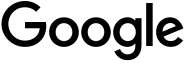
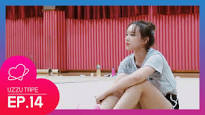
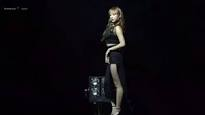
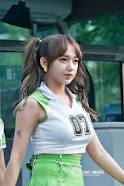
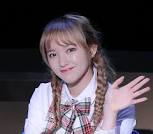
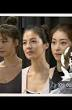
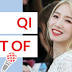

In [49]:
# 성소를 구글에서 검색한 결과이다.

result.decode()

In [61]:
params = url.split("&")[0].split("?")
params.extend(url.split("&")[1:])
params = {_.split("=")[0] : _.split("=")[1] for _ in params[1:]}
params

{'q': '%EC%84%B1%EC%86%8C',
 'oq': '%EC%84%B1%EC%86%8C',
 'aqs': 'chrome..69i57j0l5.964j0j4',
 'sourceid': 'chrome',
 'ie': 'UTF-8'}

In [62]:
# 웹은 byte로만 통신한다. 유니코드를 쓸수 없으므로, 퍼센트 인코딩해서 통신한다.
# unquote는 퍼센트 인코딩을 유니코드로 바꿔준다. 

print(params['q'])
parse.unquote(params['q'])

%EC%84%B1%EC%86%8C


'성소'

In [63]:
# 반대로 퍼센트 인코딩을 할 수도 있다.

parse.quote('성소')

'%EC%84%B1%EC%86%8C'

In [64]:
# 에러 나는게 정상입니다.

# 퍼센트인코딩이 필요한 이유
# 한글로 파라미터를 주니까 에러가 난다. 

resp = request.urlopen("https://google.com/search?q=성소")

UnicodeEncodeError: 'ascii' codec can't encode characters in position 14-15: ordinal not in range(128)

In [82]:
parse.urljoin(url, "/search?"+parse.urlencode(params))

'https://www.google.com/search?q=%EC%84%B1%EC%86%8C&oq=%EC%84%B1%EC%86%8C&aqs=chrome..69i57j0l5.964j0j4&sourceid=chrome&ie=UTF-8'

In [65]:
newUrl = parse.urljoin(url, "/search?"+parse.urlencode(params))
req = request.Request(newUrl, headers=headers)
resp = request.urlopen(req)
resp.status, resp.reason

(200, 'OK')

In [74]:
req.get_full_url()

'https://www.google.com/search?q=%25EC%2584%25B1%25EC%2586%258C&oq=%25EC%2584%25B1%25EC%2586%258C&aqs=chrome..69i57j0l5.964j0j4&sourceid=chrome&ie=UTF-8'

In [71]:
# urlencode를 쓰면 딕셔너리로, 한글(유니코드)로 써서 파라미터를 전달해도, 알아서 퍼센트 인코딩해서 parameter로 만들어준다.

params['q'] = params['oq'] = '성소'
print(params)
print(parse.urlencode(params))

{'q': '성소', 'oq': '성소', 'aqs': 'chrome..69i57j0l5.964j0j4', 'sourceid': 'chrome', 'ie': 'UTF-8'}
q=%EC%84%B1%EC%86%8C&oq=%EC%84%B1%EC%86%8C&aqs=chrome..69i57j0l5.964j0j4&sourceid=chrome&ie=UTF-8


# 에러 처리

In [72]:
from urllib import error

In [75]:
try:
    resp = request.urlopen(url)
except error.HTTPError as e:
    print(e.code)
    print(e.reason)
    print(e.headers)

403
Forbidden
Content-Type: text/html; charset=UTF-8
Date: Tue, 03 Sep 2019 07:32:42 GMT
Server: gws
Cache-Control: private
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Alt-Svc: quic=":443"; ma=2592000; v="46,43,39"
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close




# parse 띄워쓰기

In [79]:
# 띄워쓰기를 포함시키려면 quote_plus를 써야한다.
# 잘 보면, 띄어쓰기를 +로 썼다는 것을 알 수 있다.

parse.quote("성 소"), parse.quote_plus("성 소")

('%EC%84%B1%20%EC%86%8C', '%EC%84%B1+%EC%86%8C')

In [78]:
# unquote할때도 띄어쓰기가 포함된 쿼리인지, 아닌지에 따라서 _plus를 써야한다.

parse.unquote('%EC%84%B1+%EC%86%8C'), parse.unquote_plus('%EC%84%B1+%EC%86%8C')

('성+소', '성 소')